# Finch Carr PHYS 434 HW 2
## Problem 1)
- I want to find out which is more probable when rolling 2 six-sided dice: rolling two ones together or rolling sevens (dice sum to seven) as well as the ratio of the probabilities

In [1]:
# Finch's Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import random
%matplotlib inline

In [2]:
# Die Simulator
dice1 = stats.randint(1, 7)
dice1.rvs(10000).min()
dice2 = stats.randint(1, 7)
dice2.rvs(10000).max()

6

- In the *'stats.randint()'* function, the upper bound of 7 is exclusive so the integers possible are 1-6 like a real die piece
- The *'.rvs(10000).max()'* function returns the maximum from the 10000 hypothetical rolls I made. Since it returned a max value of 6 over 10000 rolls, I can probably say that my dice roller simulation is working
- I can now calculate the probability of rolling a specific integer between 1 and 6 using the *'.pmf()'* function

In [3]:
dice1.pmf(5), dice2.pmf(7)

(0.16666666666666666, 0.0)

- I see that I have a 1/6 chance of rolling a 5, and a 0% chance of rolling a 7, both probability values are what I would expect from a fair die piece. 
- I can now calculate the probability of one dice roll, and knowing that two separate dice rolls are independent events, I can calculate the total probability of the two events occuring (rolling snake eyes) using the correct equation and parameters

In [4]:
SnakeEyes = dice1.pmf(1)*dice2.pmf(1)
SnakeEyes * 100

2.7777777777777777

- I find that there is a mere 2.7% chance that I would roll snake eyes on any given 2-dice roll
- Let's find the probability for rolling numbers that sum to a total roll value of 7 next
   - All possible combinations that sum to seven are (1-6, 2-5, 3-4, 4-3, 5-2, and 6-1) or the first half of those probabilities multiplied by a factor of 2 and summed

In [5]:
SevenSum = (2*(dice1.pmf(1)*dice2.pmf(6))) + (2*(dice1.pmf(2)*dice2.pmf(5))) + (2*(dice1.pmf(3)*dice2.pmf(4)))
SevenSum * 100

16.666666666666664

- I find that there is a 16% chance my two dice rolls will result in a total sum of 7

In [6]:
SevenSum / SnakeEyes

6.0

- ANSWER: **Based on the probabilities calculated above, it is 6 times more likely that I'll roll any outcome with a sum of 7 than I will roll the only outcome with two 1's**

# Problem 2

- I now want to show how to use the convolution operator to determine the probability of the sum of 2 six-sided dice
  - I already found the probability of two dice summing to 7 the long way, but convolution can help me more efficiently

In [7]:
diceA = [1,2,3,4,5,6]
diceB = [1,2,3,4,5,6]
np.convolve(diceA, diceB, mode='full')

array([ 1,  4, 10, 20, 35, 56, 70, 76, 73, 60, 36])

- The input arrays are possible outcomes for each roll, not probabilities, so it is no surprise that the output array does not include probabilities
- The discrete convolution function can be defined mathematically as $y(n) = (a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]$
- Where (for our dice situation):
    - y = the convolution output from f and g over an interval n
      - y is an output array (in 'full' mode) of the length m+n-1 (so in our case the length=11)
    - a = a 1D vector with a length m
      - (I used 'diceA' array with length of 6) so m=6 in this case 
    - v = a 1D vector with a length n
      - (I used 'diceB' array with length of 6) so n=6 in this case
- The convolution operator flips the order of the 'v' array, then it "slip 'n slides" that vector over the 'a' vector, and finally it multiplies the overlapping numbers and then sums them together before sliding another length unit and repeating the process until the arrays no longer overlap anymore
- I can prove this convolution function is correct and accurate by using the 'valid' mode in the 'np.convolve()' function, since it takes only the positions that have the arrays completely covering each other. Let's prove it
  - The visual representation would be as follows:
    - \[1,2,3,4,5,6\]
    - \[6,5,4,3,2,1\]
    - so 1 and 6 are multiplied, just like 2 and 5, so on and so forth

In [9]:
# The visual representation's mathematics:
Visual = ((1*6)+(2*5)+(3*4)+(4*3)+(5*2)+(6*1))

#The convolution function with the 'valid' mode:
ConvEx = np.convolve(diceA, diceB, mode='valid')
Visual, ConvEx[0]

(56, 56)

- Since the two results are equal, I know that I can now use the np.convolve function to help me determine the sum of the probabilities of two dice rolls.
- I know that 6 sides on each die lead to 36 possible combinations of roll results. Lots of different results will sum to the same total, however (i.e. A1 and B4 sum to 5 just like A2 and B3 do). I want the probability of each individual sum, like the probability from the previous question that my rolls will sum to 7, but I don't want to recode *SevenSum* and all its possible inputs for every possible sum from 2 (A1 and B1) to 12 (A6 and B6)
- This is where convolution should be able to help! It turns out that the probability density of a sum of random numbers (whether those numbers are 1-6 and 1-6 summed, or 0-infinity and 0-infinity summed) is the convolution of their individual probability density functions
  - Therefore, I need the individual probability density functions for each die result to convolve, and then we can combine them for the pdf of their sum (Commutative Property)
  - I should also note that for two independent dice rolls A and B, $\sigma_0 = \sigma_A + \sigma_B$, and $\mu_0 = \mu_A + \mu_B$
    - Their $\sigma$ and $\mu$ values add to a total value for each respectively, that is the mean and standard deviation for the distribution of the sums!

In [181]:
# Let's create an array of probabilities for the 6 outcomes of a die, and create 2 since there are 2 dice to sum
# dicePA can stand for probability of Die A, so on and so forth for infinite dice if we wanted them
dicePA = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dicePB = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Now I can convolve the probabilities of the two dice rolls to get a probability distribution of their sums
DiceSumP = np.convolve(dicePA, dicePB, mode='full')
DiceSumP

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

- If I convolve the probability arrays of two fair dice, I see the probabilities of their combined sums in array order from 2 - 12

### Analytical Portion of Number 2

  - Sums and their respective options of outcome to achieve on dice A and B for reference
   - 2 (1,1) x1 1
   - 3 (2,1) x2 2
   - 4 (1,3) x2, (2,2) x1 3
   - 5 (1,4) x2, (2,3) x2 4
   - 6 (1,5) x2, (2,4) x2, (3,3) x1 5
   - 7 (1,6) x2, (2,5) x2, (3,4) x2 6
   - 8 (2,6) x2, (3,5) x2, (4,4) x1 5
   - 9 (3,6) x2, (4,5) x2, 4
   - 10 (4,6) x2, (5,5) x1, 3
   - 11 (5,6) x2
   - 12 (6,6) x1

- Total Outcomes = 1+2+3+4+5+6+5+4+3+2+1 = 36 total options

- Probabilities of Each sum (must sum to 36/36 i.e. 1)
  - p2 = 1/36
  - p3 = 2/36
  - p4 = 3/36
  - p5 = 4/36
  - p6 = 5/36
  - p7 = 6/36
  - p8 = 5/36
  - p9 = 4/36
  - p10 = 3/36
  - p11 = 2/36
  - p12 = 1/36

# Problem 3

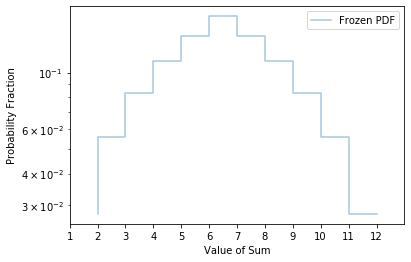

In [179]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
DiceSumP = np.convolve(dicePA, dicePB, mode='full')
# Create our x-axis we can plot the step function of a 2-dice sum pdf on
dice2 = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    
# Let's plot a histogram of those 10000 hypothetical dice rolls 
# and compare it to the normal distribution
ax.step(dice2, DiceSumP, alpha=0.4, label='Frozen PDF')
plt.xlabel('Value of Sum')
plt.xlim(1,13,1)
plt.ylabel('Probability Fraction')
plt.xticks(np.arange(1,13,1))
plt.legend(loc='best')
plt.show()

- Above I can see a step function of the probabilities of rolling a set of sums with two dice
- I can calculate the mean of the distribution of sums using convolution of A and B where:
  - A = the probability of the sums
  - B = the reversed array of the values of possible sums themselves
  - **NOTE:** I reverse the array of sums so that each probability is associated with its specific outcome probability when the reversed array is then reversed again by the convolution function itself (in this case the probabilities are symmetric so reversing the order doesn't matter, but in principle the array should be reversed)
- Variance can be calculated since I also know the variance of two completely independent events to be related to the individual variance of the independent events respectively by the following equation:
  - $Var(A+B) = Var(A) + Var(B)$
  - I also know that the events are independent but equal so their individual variances are the same, therefore we can state:
    - $Var(A+B) = 2Var(A) = 2Var(B)$

In [180]:
DiceSumP = np.convolve(dicePA, dicePB, mode='full')
dice12r = dice12[::-1]
mu2 = np.convolve(DiceSumP, dice12r, mode='valid')
var2 = 2*np.var([1,2,3,4,5,6])
print(f'ANSWER: The mean of the 2-dice sum distribution is {mu2[0]}, and the Variance of the distribution is {var2}')

ANSWER: The mean of the 2-dice sum distribution is 7.0, and the Variance of the distribution is 5.833333333333333


# Problem 4
- I want to find the distribution of the sums of 10 dice rolls
- I should be able to create a convolution in a for loop such that the probability distribution of one dice roll convolves itself as many times as it takes to reach the pdf of 10 dice rolls
- The length of the array of a 10-dice roll pdf should be equal to amount of possible sums achievable (i.e. one probability value for every possible sum achievable)
  - Possible sums are 60 - 10 (inclusive of 10) which is equal to 60-10+1=51
  - If the length of my output array is 51 terms, then I can say that the for loop completed the convolutions required to return the correct pdf

In [182]:
DiceSumP = np.convolve(dicePA, dicePB, mode='full')
diceP1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
diceP2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

roll10 = 9

for i in range(roll10):
    if i == 0:
        DiceP10 = np.convolve(diceP1, diceP2, mode='full')
    else:
        DiceP10 = np.convolve(diceP1, DiceP10, mode='full')
len(DiceP10)

51

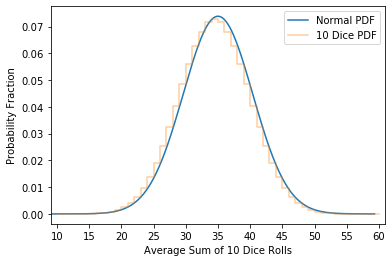

In [170]:
fig, ax = plt.subplots(1,1)
plt.yscale('log')
SumRoll10 = np.arange(10,61,1)
SumRoll10r = SumRoll10[::-1]
mu10 = np.convolve(DiceP10, SumRoll10r, mode='valid')
var10 = 10*np.var([1,2,3,4,5,6])
sigma10 = np.sqrt(var10)

# Let's create a random variable subset to plot a Normal Distribution with the 
# same mean and standard deviation on that we'll compare to our results
x = np.sort(stats.norm.rvs(mu10, sigma10, 1000000))
ax.plot(x, stats.norm.pdf(x, mu10, sigma10), label='Normal PDF')

# Let's plot a step function with an x-axis of possible sums and outputs of our
# probability distribution and compare it to the normal distribution
ax.step(SumRoll10, DiceP10, alpha=0.4, label='10 Dice PDF')
plt.xlabel('Sum of 10 Dice Rolls')
plt.xlim(9,61,1)
ax.legend(loc='best')
plt.ylabel('Probability Fraction')
plt.xticks(np.arange(10,61,5)) 
plt.show()

- We can see above that the distribution of the average sum of 10 dice rolls fits a normal distribution curve very well. Thus we can say that the distribution is Gaussian if not very very very similar to a Gaussian distribution. The distribution achieves this because of the averaging of the 10 separate distributions. 
  - If we had averaged over the sum of 100 dice rolls, the distribution would appear even more Gaussian in form
  - The averaging by convolution of the sums and their probabilities helps the distribution by application of the Central Limit Theorem
    - This theorem states that a population with a mean $\mu$ and standard deviation $\sigma$ with sufficiently large enough samples from that population, the distribution of the sample means will be approximately normally distributed
    - Since our population was the numbers 1-6 on a die piece picked 10 times and summed, and then that population was resampled over and over again, our data began to take the shape of a normalized distribution.